# Handwritten Digits Recognition using Tensorflow

- Hey everyone, this is my first complete machine learning project where I have worked on solving the problem on recognising `Handwritten Digits`.

- Like many of you this is my first step to understanding this branch of computer science and hopefully mastering it soon.

- Through this project I have taken the `first step towards my school dream` of building machine learning models.

- I am open to constructive criticism and suggestions in developing my model even further if any 🙂.

## Necessary Imports

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Importing the training dataset with handwritten digits

In [3]:
digits = pd.read_csv("../../Datasets/train.csv")

## Exploring the dataset

In [4]:
digits.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [5]:
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Seperating the Pixel Data from the Labels

In [7]:
labels = digits["label"]
print(labels.info())

digits = digits.drop("label", axis = 1)
digits.head()

<class 'pandas.core.series.Series'>
RangeIndex: 42000 entries, 0 to 41999
Series name: label
Non-Null Count  Dtype
--------------  -----
42000 non-null  int64
dtypes: int64(1)
memory usage: 328.2 KB
None


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Viewing the digits

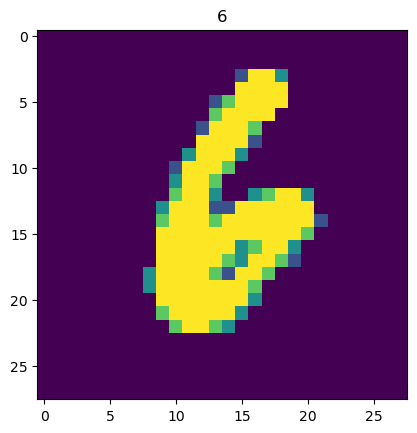

In [11]:
sample = digits.iloc[3700].to_numpy()
sample = sample.reshape((28, 28))

plt.title(f"{labels.iloc[3700]}")
plt.imshow(sample)

## Splitting the training and validation data

In [12]:
X_train, y_train = digits.iloc[:35000], labels.iloc[:35000]
X_valid, y_valid = digits.iloc[35000:], labels.iloc[35000:]

In [13]:
print(X_train.info(), "\n\n")
print(y_train.info(), "\n\n")
print(X_valid.info(), "\n\n")
print(y_valid.info(), "\n\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 209.4 MB
None 


<class 'pandas.core.series.Series'>
RangeIndex: 35000 entries, 0 to 34999
Series name: label
Non-Null Count  Dtype
--------------  -----
35000 non-null  int64
dtypes: int64(1)
memory usage: 273.6 KB
None 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 35000 to 41999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 41.9 MB
None 


<class 'pandas.core.series.Series'>
RangeIndex: 7000 entries, 35000 to 41999
Series name: label
Non-Null Count  Dtype
--------------  -----
7000 non-null   int64
dtypes: int64(1)
memory usage: 54.8 KB
None 




In [14]:
print(X_train.iloc[1].shape)

(784,)


## Normalizing the Data

In [15]:
X_train /= 255
X_valid /= 255

## Designing the Model

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (784,)),
    tf.keras.layers.Dense(units = 28, activation = "relu", kernel_regularizer = tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dense(units = 28, activation = "relu", kernel_regularizer = tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dense(units = 28, activation = "relu", kernel_regularizer = tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dense(units = 10, activation = "linear")
])

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0008), 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
              metrics = ["accuracy"])

Metal device set to: Apple M2


2023-03-01 23:59:33.928576: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-01 23:59:33.929427: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## Training the model

In [17]:
model.fit(X_train, y_train, epochs = 50)

Epoch 1/50


2023-03-01 23:59:40.742744: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-01 23:59:40.882351: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1094/1094 [==============================] - 5s 5ms/step - loss: 1.0884 - accuracy: 0.8294
Epoch 2/50
1094/1094 [==============================] - 5s 5ms/step - loss: 0.7177 - accuracy: 0.9025
Epoch 3/50
1094/1094 [==============================] - 5s 5ms/step - loss: 0.6377 - accuracy: 0.9134
Epoch 4/50
1094/1094 [==============================] - 5s 5ms/step - loss: 0.5943 - accuracy: 0.9180
Epoch 5/50
1094/1094 [==============================] - 5s 5ms/step - loss: 0.5602 - accuracy: 0.9222
Epoch 6/50
1094/1094 [==============================] - 5s 5ms/step - loss: 0.5361 - accuracy: 0.9267
Epoch 7/50
1094/1094 [==============================] - 5s 5ms/step - loss: 0.5141 - accuracy: 0.9295
Epoch 8/50
1094/1094 [==============================] - 5s 5ms/step - loss: 0.4948 - accuracy: 0.9325
Epoch 9/50
1094/1094 [==============================] - 5s 5ms/step - loss: 0.4808 - accuracy: 0.9338
Epoch 10/50
1094/1094 [==============================] - 5s 5ms/step - loss: 0.4675 - accurac

## Checking the preformance of the model on the training set

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 28)                21980     
                                                                 
 dense_1 (Dense)             (None, 28)                812       
                                                                 
 dense_2 (Dense)             (None, 28)                812       
                                                                 
 dense_3 (Dense)             (None, 10)                290       
                                                                 
Total params: 23,894
Trainable params: 23,894
Non-trainable params: 0
_________________________________________________________________


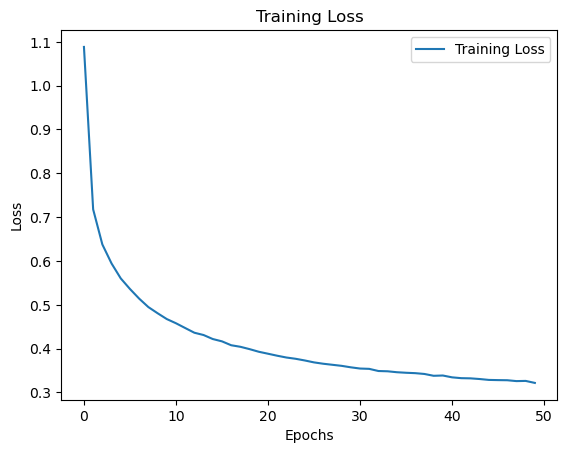

In [20]:
# Retrieving the Loss of the Model during training
loss = model.history.history["loss"]

# Plotting the loss of the model
plt.plot([i for i in range(50)], loss, label = "Training Loss")
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Checking the performance on the Validation Dataset

In [21]:
model.fit(X_valid, y_valid)

219/219 [==============================] - 1s 5ms/step - loss: 0.3287 - accuracy: 0.9509


## Importing the Testing CSV and Making the Predictions

In [23]:
test_digit = pd.read_csv("../../Datasets/test.csv")
test_digit.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Making the predictions
predictions = model.predict(test_digit)

115/875 [==>...........................] - ETA: 1s

2023-03-02 00:07:35.186992: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


875/875 [==============================] - 1s 1ms/step


## Creating a list of the predictions

In [25]:
class_predictions = list(map(np.argmax, predictions))
for i in range(5):
    print(class_predictions[i])

2
0
9
9
3


## Testing the predictions

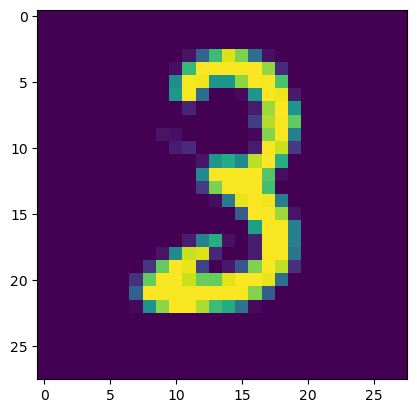

In [26]:
sample = test_digit.iloc[4].to_numpy()
sample = sample.reshape((28, 28))

plt.imshow(sample)

## Creating a csv of the predictions

In [27]:
class_predictions = list(zip([i for i in range(1, 28001)], class_predictions))
for i in range(5):
    print(class_predictions[i])

(1, 2)
(2, 0)
(3, 9)
(4, 9)
(5, 3)


In [28]:
pred_df = pd.DataFrame(class_predictions, columns = ["ImageId", "Label"])
pred_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


## Converting the data to a CSV

In [29]:
pred_df.to_csv("PREDICTION.csv", index = False)